In [1]:
###We will drop the Energy data, since correlation = 0.440551 < 0.7.

###adj r^2: 0.9555817084123276 (before) => 0.9492478171852133 (after)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
%run MLR_Functions.ipynb

In [4]:
df_rice_y = pd.read_csv("df_crop_yield.csv")
df_fert_use = pd.read_csv("df_fertilizer_usage.csv")
df_cropland = pd.read_csv("df_cropland.csv")
#df_energy = pd.read_csv("df_energy_usage.csv")
df_pop = pd.read_csv("df_urban_rural_pop.csv")
df_water = pd.read_csv("df_water_usage.csv")
df_pesticide = pd.read_csv("df_pesticide_usage.csv")
df_pesticide_imports = pd.read_csv("df_pesticide_imports.csv")
df_air_dep = pd.read_csv("df_air_deposition_nitrogen.csv")

In [5]:
df_VIET = pd.DataFrame()
df_VIET["Yield"] = df_rice_y["Vietnam Rice Yield"]
#df_VIET["Cropland"] = df_cropland["Vietnam Crop Land"]
#df_VIET["Energy"] = df_energy["Vietnam energy/cropland"]
df_VIET["Fert"] = df_fert_use["Vietnam"]
df_VIET["Rural Pop"] = df_pop["vietnam rural/total"]
df_VIET["Urban Pop"] = df_pop["vietnam urban/total"]
df_VIET["Water"] = df_water["wf_tot_m3_t_vietnam"]
df_VIET["Pesticide"] = df_pesticide["China Pesticide"]
df_VIET["Pesticide Import"] = df_pesticide_imports["Vietnam"]
df_VIET["Air Deposition of Nitrogen"] = df_air_dep["Vietnam Air Deposition of Nitrogen"]

df_VIET

,Yield,Fert,Rural Pop,Urban Pop,Water,Pesticide,Pesticide Import,Air Deposition of Nitrogen
0,3.1815,87.759995,0.812884,0.206500,1328.817423,1.17,0.833458,5.7227
1,3.1133,121.689995,0.808945,0.210249,1290.906476,1.16,0.828139,6.3248
2,3.3342,114.440000,0.805125,0.214101,1270.650182,1.22,1.467032,6.3505
3,3.4815,111.569990,0.801412,0.218033,1198.310536,1.30,2.119933,6.6525
4,3.5657,173.950000,0.797623,0.222018,1097.209344,1.49,2.764613,7.3443
5,3.6898,181.269990,0.793535,0.225987,1146.850298,1.64,3.456741,7.4115
6,3.7689,211.940000,0.789104,0.229927,1035.770710,1.72,3.974925,7.9859
7,3.8768,204.340010,0.784481,0.233857,1007.201330,1.80,4.491015,8.3045
8,4.0007,250.489990,0.779445,0.237727,1132.637192,1.84,5.879209,10.0853
9,4.1018,264.770000,0.774190,0.242037,900.709517,1.99,5.055682,8.8630


In [6]:
# Extract the features and the target
df_features, df_target = get_features_targets(df_VIET,["Fert","Rural Pop", "Urban Pop", "Water","Pesticide", "Pesticide Import", "Air Deposition of Nitrogen"],["Yield"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state = 100, test_size = 0.3)

#print(df_features_train)
#print(df_features_test)

# Normalize the features using z normalization
array_features_train_z, means, stds = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions

X: np.ndarray = prepare_feature(array_features_train_z)
target: np.ndarray = df_target_train.to_numpy()

iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((8,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha,iterations)

# call the predict() method
pred: np.ndarray = predict_linreg(df_features_test,beta, means,stds)

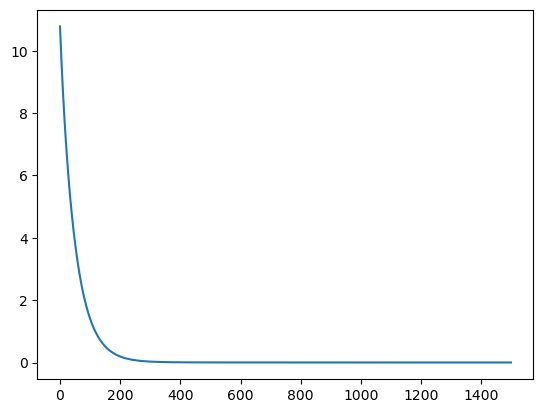

In [7]:
plt.plot(J_storage)

In [10]:
# change target test set to a numpy array
target: np.ndarray = df_target_test.to_numpy()

# Calculate r2 score by calling a function
r2: float = r2_score(target, pred)
    
# Calculate adj r2
#Set the n and k
n = 120
k = 7
adj_r2: float = adj_r_squared(n,k,target,pred)

# Calculate the mse
mse: float = np.mean((target-pred)**2)
    
# Calculate the mae
mae: float = np.mean(np.absolute(target-pred))
    
print(f"r2: {r2}")
print(f"adj_r_squared: {adj_r2}")
print(f"mse: {mse}")
print(f"mae: {mae}")

r2: 0.9522332397037302
adj_r_squared: 0.9492478171852133
mse: 0.03162664861477652
mae: 0.14386315793912363


In [13]:
print(pred)
print(df_target_test)
print(df_features_test)
print(beta)

[[4.2547991 ]
 [5.8124074 ]
 [5.89246174]
 [4.50281706]
 [3.69263   ]
 [4.39577783]
 [5.90816193]
 [5.78630012]
 [3.87720303]]
     Yield
9   4.1018
26  5.5738
28  5.8180
13  4.6387
5   3.6898
12  4.5903
27  5.5476
25  5.7597
6   3.7689
         Fert  Rural Pop  Urban Pop        Water  Pesticide  Pesticide Import  \
9   264.77000   0.774190   0.242037   900.709517       1.99          5.055682   
26  257.77002   0.665044   0.350446   750.798534       2.58         13.498934   
28  252.38998   0.651453   0.365160   676.491184       2.28         19.032825   
13  246.32000   0.750613   0.264997   887.383802       1.96          3.549817   
5   181.26999   0.793535   0.225987  1146.850298       1.64          3.456741   
12  221.29000   0.757033   0.259263   944.087548       1.95          3.551493   
27  277.66998   0.658261   0.357773   670.644750       2.48          9.662465   
25  263.09000   0.671822   0.343149   731.201526       2.63         13.702846   
6   211.94000   0.789104   0.22992

In [14]:
###6   3.7689
###6   0.315591  211.94000   0.789104   0.229927  1035.770710       1.72           3.974925                      7.9859 

country_yield = 3.7689
fert = 211.94000
rural_pop = 0.789104
urban_pop = 0.229927
water = 1035.770710
pesticide = 1.72
pesticide_imports = 3.974925
air_dep = 7.9859 

def normalise(feature_value:int, mean, std):
    return (feature_value-mean)/std
    

def get_crop_yield(fert, rural_pop, urban_pop, water, pesticide, pesticide_imports, air_dep, beta):
    fert_n = normalise(fert ,means[0],stds[0])
    rural_pop_n = normalise(rural_pop ,means[1],stds[1]) 
    urban_pop_n = normalise(urban_pop ,means[2],stds[2])
    water_n = normalise(water ,means[3],stds[3])
    pesticide_n = normalise(pesticide, means[4], stds[4])
    pesticide_imports_n = normalise(pesticide_imports, means[5],stds[5])
    air_dep_n = normalise(air_dep, means[6],stds[6])
    y = beta[0] + beta[1]*fert_n + beta[2]*rural_pop_n + beta[3]*urban_pop_n + beta[4]*water_n + beta[5]*pesticide_n + beta[6]*pesticide_imports_n + beta[7]*air_dep_n
    return y

print(get_crop_yield(fert, rural_pop, urban_pop, water, pesticide, pesticide_imports, air_dep, beta))

[3.87720174]
